<a href="https://colab.research.google.com/github/Sachingowda8431/Sachingowda8431/blob/main/assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

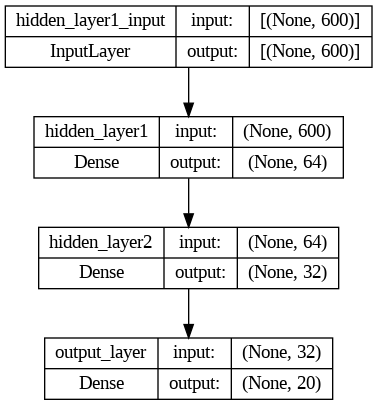

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

input_dim = 600
output_dim = 20

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu', name='hidden_layer1'))
model.add(Dense(32, activation='relu', name='hidden_layer2'))
model.add(Dense(output_dim, activation='softmax', name='output_layer'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

In [30]:
import spacy
import pandas as pd

In [31]:
df=pd.read_csv("/content/SPAM_text_message_20170820_-_Data[1].csv")

In [32]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
X=df["Message"]
y=df["Category"]

In [55]:
#documnent assebler
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
sentences = []
for message in X:
    sentences.extend(sent_tokenize(message))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar...', 'Joking wif u oni...', 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back!", "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, £1.50 to rcv', 'Even my brother is not like to speak with me.', 'They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.", 'Press *9 to copy your friends Callertune', 'WINNER!!', 'As a valued network customer you have been selected to receivea £900 prize reward!', 'To claim call 09061701461.', 'Claim code KL341.', 'Vali

In [56]:
#tokenization
from nltk.tokenize import word_tokenize
words = []
for message in X:
    words.extend(word_tokenize(message))
print(words)

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 'T', '&', 'C', "'s", 'apply', '08452810075over18', "'s", 'U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...', 'Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though', 'FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', '£1.50', 'to', 'rcv', 'Even',

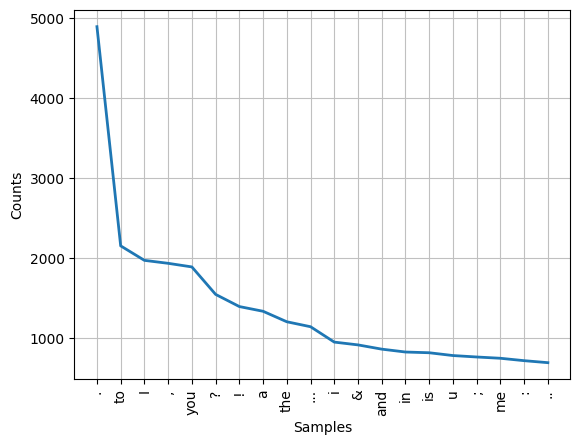

In [57]:
#visulize the freequency distribution of words
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
words = word_tokenize(' '.join(X))
freq_dist = FreqDist(words)
freq_dist.plot(20)
plt.show()

In [58]:
#dropping stop words
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

filtered_words = []
for message in X:
    doc = nlp(message)
    filtered_words.extend([token.text for token in doc if not token.is_stop])
print(filtered_words)

['jurong', 'point', ',', 'crazy', '..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', '2005', '.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', 'rate)T&C', 'apply', '08452810075over18', 'U', 'dun', 'early', 'hor', '...', 'U', 'c', '...', 'Nah', 'think', 'goes', 'usf', ',', 'lives', 'FreeMsg', 'Hey', 'darling', '3', 'week', 'word', '!', 'like', 'fun', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'send', ',', '£', '1.50', 'rcv', 'brother', 'like', 'speak', '.', 'treat', 'like', 'aids', 'patent', '.', 'request', "'", 'Melle', 'Melle', '(', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', ')', "'", 'set', 'callertune', 'Callers', '.', 'Press', '*', '9', 'copy', 'friends', 'Callertune', 'WINNER', '!', '!', 'valued', 'network', 'customer', 'selected', 'receivea', '£', '900'

In [60]:
pip install pyspellchecker

In [67]:
#spell correction
import pandas as pd
from spellchecker import SpellChecker

spell = SpellChecker()
corrected_messages = []
for message in y:
    words = message.split()
    corrected_words = [spell.correction(word) for word in words]
    corrected_message = ' '.join(corrected_words)
    corrected_messages.append(corrected_message)

print(corrected_messages)

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 's

In [68]:
#stemming
import pandas as pd
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in X]
print(stemmed_words)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18'", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though", "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv", 'even my brother is not like to speak with me. they treat me like aids patent.', "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertun", 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.', 'had your mobile 11

In [69]:
#lemmatization
nlp = spacy.load("en_core_web_sm")
lemmatized_words = []
for text in X:
    doc = nlp(text)
    lemmatized_words.extend([token.lemma_ for token in doc])
print(lemmatized_words)

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'get', 'amore', 'wat', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question(std', 'txt', 'rate)T&C', "'s", 'apply', '08452810075over18', "'s", 'u', 'dun', 'say', 'so', 'early', 'hor', '...', 'u', 'c', 'already', 'then', 'say', '...', 'nah', 'I', 'do', 'not', 'think', 'he', 'go', 'to', 'usf', ',', 'he', 'live', 'around', 'here', 'though', 'FreeMsg', 'hey', 'there', 'darle', 'it', 'be', 'be', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', 'would', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', '£', '1.50', 'to', 'rcv', 'even', 'my', 'brother', 'be', 'n

In [4]:
#ngram
import pandas as pd
import nltk
from nltk.util import ngrams
nltk.download('punkt')
def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return [' '.join(gram) for gram in n_grams]
n = 2
df['ngrams'] = df['Message'].apply(lambda x: generate_ngrams(x, n))
ngram_list = df['ngrams']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
#bygram
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
def generate_bygrams(text):
    tokens = word_tokenize(text)
    bygrams = list(ngrams(tokens, 2))
    return bygrams
df['Location'] = df['Message'].apply(generate_bygrams)
print(df[['Message', 'Location']].head())
print(df['Location'][0])

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                            Location  
0  [(Go, until), (until, jurong), (jurong, point)...  
1  [(Ok, lar), (lar, ...), (..., Joking), (Joking...  
2  [(Free, entry), (entry, in), (in, 2), (2, a), ...  
3  [(U, dun), (dun, say), (say, so), (so, early),...  
4  [(Nah, I), (I, do), (do, n't), (n't, think), (...  
[('Go', 'until'), ('until', 'jurong'), ('jurong', 'point'), ('point', ','), (',', 'crazy'), ('crazy', '..'), ('..', 'Available'), ('Available', 'only'), ('only', 'in'), ('in', 'bugis'), ('bugis', 'n'), ('n', 'great'), ('great', 'world'), ('world', 'la'), ('la', 'e'), ('e', 'buffet'), ('buffet', '...'), ('...', 'Cine'), ('Cine', 'th

In [7]:
#trygram
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
corpus = df['Message']
nltk.download('punkt')
tokenized_corpus = [word_tokenize(text.lower()) for text in corpus]
trigrams = [ngrams(tokens, 3) for tokens in tokenized_corpus]
flattened_trigrams = [trigram for sublist in trigrams for trigram in sublist]
trigram_counts = Counter(flattened_trigrams)
print(trigram_counts.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(('&', 'lt', ';'), 314), (('&', 'gt', ';'), 314), (('lt', ';', '#'), 276), ((';', '#', '&'), 276), (('#', '&', 'gt'), 276), ((':', '-', ')'), 106), (('&', 'amp', ';'), 88), ((',', 'i', "'ll"), 71), (('i', 'do', "n't"), 53), (('*', '*', '*'), 51)]
